# Traitement médical

## Imports nécessaires

In [1]:
from common import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
np.random.seed(seed=0)

## Constantes locales

In [ ]:
REGRET_OUTPUT = 'fig/A-stochastic.pdf'

## Initialisation de l'environnement

In [2]:
T = 10000
k = 5
epsilon=.1
real_means = [.4, .87, .5, .9, .85]
std_dev = .05
rewards = [np.random.normal(m,std_dev,T) for m in real_means]

bandits = [
    Uniform(k=k),
    EGreedy(epsilon=epsilon, k=k),
    UCB(k=k),
    EXP3(k=k),
]

## Évaluation des bandits sur K essais

In [3]:
xps = []

for t in range(T):
    for b in bandits:
        i = b.select()
        r = rewards[i][t]
        b.maj(r, i)
        
        xps.append({
            'bandit': MAP_NAME[b.__class__.__name__],
            'i': i,
            'r': r,
        })

## Calcul du regret cumulé

In [4]:
df = pd.DataFrame(xps)
df['regret'] = df.apply(lambda x: max(real_means) - x['r'], axis=1)
df['cum_r'] = df.groupby('bandit')['r'].cumsum()
df['cum_regret'] = df.groupby('bandit')['regret'].cumsum()

In [5]:
df

bandit  i         r    regret  \
0                              $\mathtt{UNI}$  4  0.753025  0.146975   
1      $\mathtt{\varepsilon\textrm{-}Greedy}$  0  0.488203  0.411797   
2                             $\mathtt{UCB1}$  0  0.488203  0.411797   
3                             $\mathtt{EXP3}$  0  0.488203  0.411797   
4                              $\mathtt{UNI}$  0  0.420008  0.479992   
...                                       ... ..       ...       ...   
39995                         $\mathtt{EXP3}$  3  0.909998 -0.009998   
39996                          $\mathtt{UNI}$  2  0.562775  0.337225   
39997  $\mathtt{\varepsilon\textrm{-}Greedy}$  3  0.838783  0.061217   
39998                         $\mathtt{UCB1}$  3  0.838783  0.061217   
39999                         $\mathtt{EXP3}$  3  0.838783  0.061217   

             cum_r   cum_regret  
0         0.753025     0.146975  
1         0.488203     0.411797  
2         0.488203     0.411797  
3         0.488203     0.411797  
4         1.173033     0.626967  
...            ...          ...  
39995  8894.370202   104.729798  
39996  7009.903053  1990.096947  
39997  8796.321113   203.678887  
39998  8605.013617   394.986383  
39999  8895.208986   104.791014  

[40000 rows x 6 columns]

## Graphique de la progression du regret cumulé

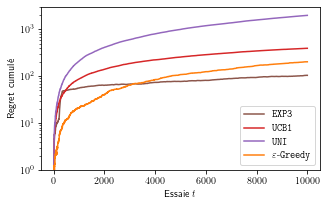

In [8]:
fig, ax = plt.subplots(figsize=(5,3))

for name, grp in df.groupby('bandit'):
    regret = grp.reset_index(drop=True)
    regret.plot(y='cum_regret', label=name, ax=ax, color=R_COLOR_MAP[name])

ax.legend()
ax.set_yscale('log')
ax.set_title('')
ax.set_xlabel('Essaie $t$')
ax.set_ylabel('Regret cumulé')
ax.set_ylim((1, 3000))

plt.savefig(REGRET_OUTPUT, transparent=True, bbox_inches='tight')